<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Automatically classify consumer goods - P6</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Notebook - Transfer Learning VGG16 |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div class="alert alert-block alert-info">
    <p>In this notebook, we are going to do the Feature extraction through VGG16 and then, we are going to classify through KMeans</p>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [24]:
## General
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

## TensorFlow
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Scikit Learn 
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Own specific functions 
from functions import *

## Images paths
THUMBNAILS_IMAGES_PATH  = "images/Flipkart/thumbnails/"

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def feature_extraction(path, image_name, model):
    """
    Method used to get the descriptors of set images 
    based on CNN (transfer learning)

    Parameters:
    -----------------
        image_name (str): Name of original image
        path (str): Image path
        model (obj): objet based on VGG16

    Returns:
    -----------------
        vgg16_feature (np asarray) : Descriptors by images

    """    
    
    # loading images
    image = load_img(path + image_name,
                     target_size=(224, 224))
    
    # Transform image to array and preprocessing it
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    # Getting the descriptors based on the model predict
    vgg16_feature = model.predict(image, use_multiprocessing=True)
    vgg16_feature = np.array(vgg16_feature)
    vgg16_feature = vgg16_feature.flatten()
    
    return vgg16_feature

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files and Initial analysis</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset to have data to compare the results
</div>

In [3]:
df_data = pd.read_csv(r"datasets\df_data.csv", index_col=[0])

In [4]:
df_data = df_data[["image", "category_1"]].copy()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Initial analysis</h3>
</div>

In [5]:
df_analysis(df_data, "df_data", analysis_type="complete")


Analysis Header of df_data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 2 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 24.6+ KB

Detailed analysis of df_data dataset
----------------------------------------------------------------------


,name,type,records,unique
0,image,object,1050,1050
1,category_1,object,1050,7


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Transfer Learning - Images features</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to use VGG16 to make a tranfer learning based on a trained neuronal network</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Setup the model</h3>
</div>

In [6]:
model = VGG16(weights="imagenet", include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Feature extraction</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to get the features by image</p>
</div>

In [7]:
df_data["VGG16"] = df_data["image"].apply(lambda x: feature_extraction(THUMBNAILS_IMAGES_PATH, x, model))

<div class="alert alert-block alert-info">
    <p>Let's see the result</p>
</div>

In [8]:
df_data.head()

,image,category_1,VGG16
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 5.1787353, 2.0781233, 0.0..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,"[0.0, 0.0, 2.3744545, 0.0, 0.0, 0.0, 0.0, 0.0,..."


<div class="alert alert-block alert-info">
    <p>Now, let's create the BoVW based on the result</p>
</div>

In [9]:
df_VGG16 = np.column_stack(df_data["VGG16"].values.tolist())
df_VGG16 = pd.DataFrame(df_VGG16).T
df_VGG16.head()

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.000000,0.0,5.178735,2.078123,0.0,0.0,0.0,0.0,...,17.991507,54.55431,0.0,0.0,0.00000,18.228214,1.754302,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,4.398548,0.0
4,0.0,0.0,2.374454,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,14.970797,0.00000,0.0,0.0,38.98354,0.000000,29.082623,0.0,0.000000,0.0


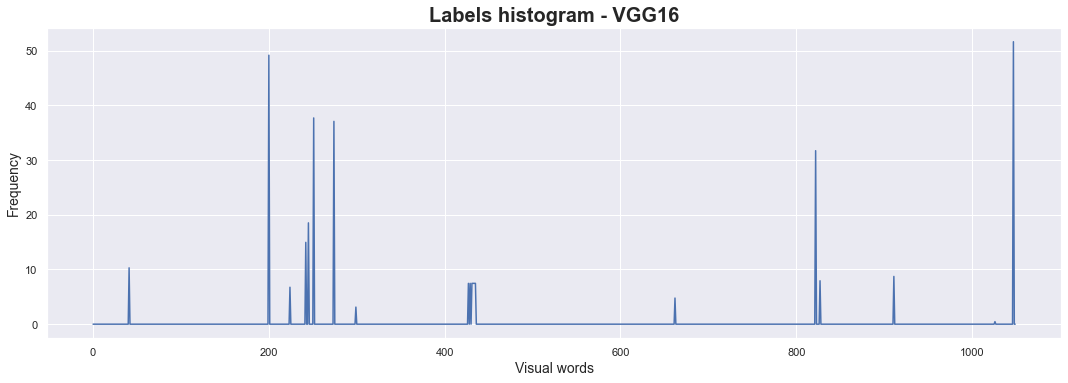

In [10]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)

ax.set_title("Labels histogram - VGG16", size=20, fontweight="bold")
ax.set_xlabel("Visual words", size=14)
ax.set_ylabel("Frequency", size=14)

ax.plot(df_VGG16[1].ravel())

plt.tight_layout()
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.3. PCA and T-SNE dimension reduction</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape before doing the PCA </p>
</div>

In [11]:
print("Dataset shape: " + str(df_VGG16.shape[0]) + " rows and " + 
      str(df_VGG16.shape[1]) + " columns")

Dataset shape: 1050 rows and 25088 columns


<div class="alert alert-block alert-info">
    <p>Next, we are going to do the PCA </p>
</div>

In [12]:
pca = PCA(n_components=0.80)
VGG16_pca = pca.fit_transform(df_VGG16)

<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape again </p>
</div>

In [13]:
VGG16_pca.shape

(1050, 392)

<div class="alert alert-block alert-info">
    <p>Before doing the T-SNE, we are going to <b>Encode</b> through LabelEncoder the first level of the tree categories </p>
</div>

In [14]:
le = LabelEncoder()
df_data["category_encode"] =df_data[["category_1"]].apply(le.fit_transform)
df_data[["category_1", "category_encode"]].head()

,category_1,category_encode
0,Home Furnishing,4
1,Baby Care,0
2,Baby Care,0
3,Home Furnishing,4
4,Home Furnishing,4


<div class="alert alert-block alert-info">
    <p>Let's reduced the dimension through T-SNE</p>
</div>

In [15]:
tsne = TSNE(n_components=2, perplexity=30,
            n_iter=2000, init="random",
            random_state=6, learning_rate="auto")

X_tsne = tsne.fit_transform(VGG16_pca)

VGG16_pca_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
VGG16_pca_tsne["class_encode"] = df_data["category_encode"]
VGG16_pca_tsne["class"] = df_data["category_1"]

VGG16_pca_tsne.head()

,tsne1,tsne2,class_encode,class
0,8.734866,13.773518,4,Home Furnishing
1,-1.600265,-10.065642,0,Baby Care
2,9.467382,-6.931741,0,Baby Care
3,14.233299,0.066385,4,Home Furnishing
4,4.991502,19.435167,4,Home Furnishing


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.4. Clusterization</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.1. KMeans</h4>
</div>

<div class="alert alert-block alert-info">
    <p>The number of cluster based on the first level of the tree categories</p>
</div>

In [16]:
n_clusters = df_data["category_1"].nunique()

<div class="alert alert-block alert-info">
    <p>Let's do the clusterization</p>
</div>

In [17]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,
                max_iter=1000, random_state=10)

cluster_labels = kmeans.fit_predict(VGG16_pca_tsne[["tsne1", "tsne2"]])
VGG16_pca_tsne["cluster"] = cluster_labels

# Calculating ARI based on the first level of the tree categories
ari = adjusted_rand_score(VGG16_pca_tsne["class_encode"], VGG16_pca_tsne["cluster"])

In [18]:
print("ARI score: " + str(round(ari, 3)))

ARI score: 0.331


<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">3.4.1. Comparison with SIFT and ORB results</h5>
</div>

In [48]:
comparison = {
    "VGG16": ari,
    "sift_price_bow_stemmed": 0.2564240292350121,
    "orb_tfidf_lemma": 0.15388828176884256,
}

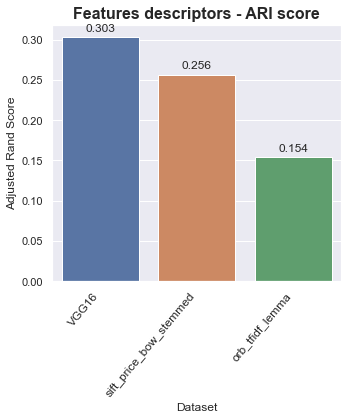

In [54]:
fig = plt.figure(figsize=(5, 6))
plot = sns.barplot(x=list(comparison.keys()), y=list(comparison.values()))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=list(comparison.keys()), rotation=50, size=12, horizontalalignment="right")
plt.ylabel("Adjusted Rand Score", size=12)
plt.xlabel("Dataset", size=12)
plt.title("Features descriptors - ARI score", size=16, fontweight="bold")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Making a simple transfer learning, we have gotten a better result compared to SIFT and ORB.</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.2. Visual analysis</h4>
</div>

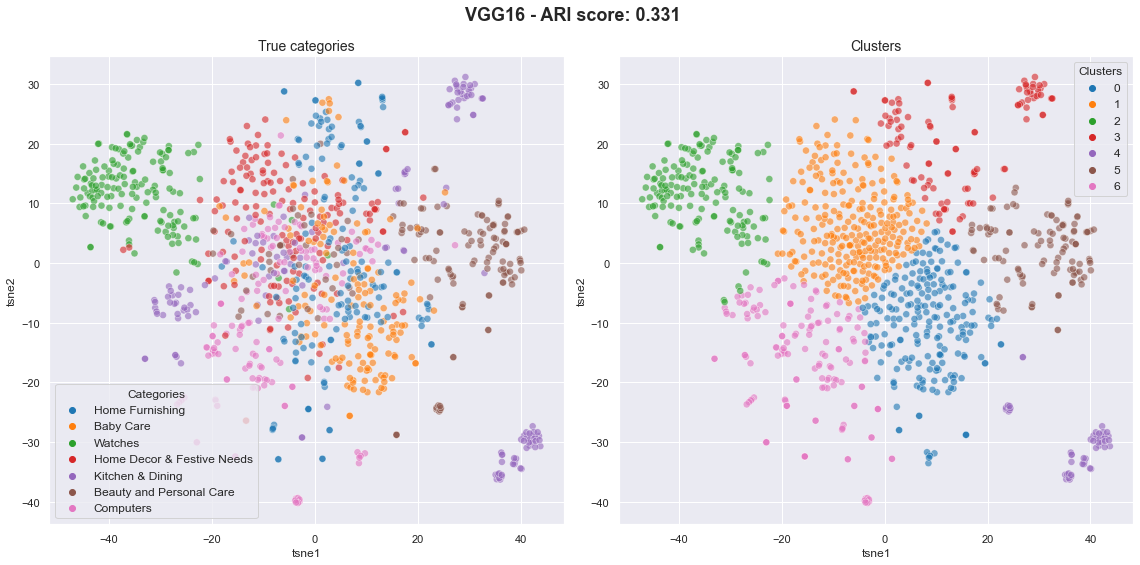

In [19]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
fig.suptitle(" VGG16 - ARI score: " + str(round(ari, 3)),
             fontsize=18, fontweight="bold")    

sns.scatterplot(ax=axes[0], x="tsne1", y="tsne2", hue="class", 
                data=VGG16_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[0].legend(loc="best", prop={"size": 12},
          title="Categories")
axes[0].set_title("True categories", fontsize=14)

sns.scatterplot(ax=axes[1], x="tsne1", y="tsne2", hue="cluster", 
                data=VGG16_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[1].legend(loc="best", prop={"size": 12},
          title="Clusters")
axes[1].set_title("Clusters", fontsize=14)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Making a simple transfer learning, we have gotten an acceptable result.</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.3. Confusion matrix</h4>
</div>

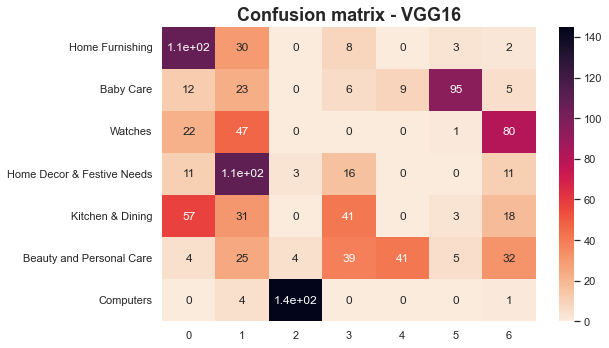

 >> ARI score:				0.331
 >> Accuracy classification score:	14.48
 >> Classification report
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       150
           1       0.09      0.15      0.11       150
           2       0.00      0.00      0.00       150
           3       0.15      0.11      0.12       150
           4       0.00      0.00      0.00       150
           5       0.05      0.03      0.04       150
           6       0.01      0.01      0.01       150

    accuracy                           0.14      1050
   macro avg       0.11      0.14      0.12      1050
weighted avg       0.11      0.14      0.12      1050

--------------------------------------------------------------------------------




In [20]:
df_matrix = confusion_matrix(VGG16_pca_tsne["class_encode"],
                             VGG16_pca_tsne["cluster"])

df_matrix = pd.DataFrame(df_matrix, index=[class_encode for class_encode in VGG16_pca_tsne["class"].unique().tolist()],
                         columns=range(len(VGG16_pca_tsne["class"].unique())))

plt.figure(figsize = (9, 5))
plt.title("Confusion matrix - VGG16",
         fontsize=18, fontweight="bold")  
sns.heatmap(df_matrix, annot=True, cmap="rocket_r")

plt.tight_layout()
plt.show()

print(" >> ARI score:\t\t\t\t" + str(round(ari, 3)))
print(" >> Accuracy classification score:\t" + str(round(accuracy_score(VGG16_pca_tsne["class_encode"],
                                                                        VGG16_pca_tsne["cluster"])*100, 2)))

print(" >> Classification report")
print(classification_report(VGG16_pca_tsne["class_encode"], VGG16_pca_tsne["cluster"]))
print("-"*80)
print("\n")

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Transfer Learning CNN - Images and text features</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use the descriptors obtained through VGG16 along with BoW + Price</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.1. Merging datastes</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to combinate the descriptors based on VGG16 with the best result of text features</p>
</div>

In [21]:
df_text = pd.read_csv(r"datasets\tfidf_lemma_price.csv", index_col=[0])
df_text.head()

,retail_price_log2,pn_abstract,pn_adapter,pn_aero,pn_air,pn_almond,pn_antique,pn_apple,pn_aroma,pn_art,...,ps_wood,ps_wooden,ps_wool,ps_world,ps_wrap,ps_wrapper,ps_wrist,ps_year,ps_ym,ps_zipper
0,0.729229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.367404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.825826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.822812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-info">
    <p>We are going to concatenate data based on the following dataset</p>
    <ul style="list-style-type: square;">
        <li><b>Features based on text data</b></li>
        <ul style="list-style-type: disc;">
            <li><b>tfidf_lemma_price</b>: Term Frequency (TF-IDF) + Lemmatization the tokens + price</li>
        </ul>
        <li><b>Features based on image data</b></li>
        <ul style="list-style-type: disc;">
            <li><b>df_VGG16</b>: Features extracted based on VGG16</li>
        </ul> 
    </ul>  
</div>

In [22]:
df_final = pd.merge(df_text, df_VGG16, left_index=True, right_index=True)

In [23]:
df_final.head()

,retail_price_log2,pn_abstract,pn_adapter,pn_aero,pn_air,pn_almond,pn_antique,pn_apple,pn_aroma,pn_art,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.729229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.991507,54.55431,0.0,0.0,0.00000,18.228214,1.754302,0.0,0.000000,0.0
1,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
2,0.367404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
3,0.825826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,4.398548,0.0
4,0.822812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.970797,0.00000,0.0,0.0,38.98354,0.000000,29.082623,0.0,0.000000,0.0


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.2. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
    <p>All features are numerical</p>
</div>

In [28]:
numerical_pipeline = make_pipeline(QuantileTransformer(random_state=42, output_distribution="uniform"))

# Getting columns and index of dataset
df_columns = df_final.columns
df_index = df_final.index

preprocessor = make_column_transformer(
    (numerical_pipeline, df_columns)
)

data_scaled = preprocessor.fit_transform(df_final)
df_scaled = pd.DataFrame(data_scaled, index=df_index, columns=df_columns)

C:\Users\Samir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Samir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
df_scaled

,retail_price_log2,pn_abstract,pn_adapter,pn_aero,pn_air,pn_almond,pn_antique,pn_apple,pn_aroma,pn_art,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.729229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.948825,0.999824,0.0,0.000000,0.000000,0.977714,0.868487,0.000000,0.000000,0.0
1,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.367845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.825826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.931087,0.0
4,0.822809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.934339,0.000000,0.0,0.000000,0.998067,0.000000,0.970307,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.625125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.789476,0.971654,0.0,1.000000,0.000000,0.970695,0.880857,0.000000,0.951525,0.0
1046,0.926490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.987982,0.000000,0.0,0.995932,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1047,0.919920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.902645,0.970851,0.0,0.000000,0.000000,0.960856,0.000000,0.000000,0.939201,0.0
1048,0.874265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.922762,0.927596,0.000000,0.0


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.3. PCA and T-SNE dimension reduction</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape before doing the PCA </p>
</div>

In [31]:
print("Dataset shape: " + str(df_scaled.shape[0]) + " rows and " + 
      str(df_scaled.shape[1]) + " columns")

Dataset shape: 1050 rows and 26223 columns


<div class="alert alert-block alert-info">
    <p>Next, we are going to do the PCA </p>
</div>

In [32]:
pca = PCA(n_components=0.80)
df_scaled_pca = pca.fit_transform(df_scaled)

C:\Users\Samir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape again </p>
</div>

In [33]:
print("Dataset shape: " + str(df_scaled_pca.shape[0]) + " rows and " + 
      str(df_scaled_pca.shape[1]) + " columns")

Dataset shape: 1050 rows and 551 columns


<div class="alert alert-block alert-info">
    <p>Let's reduced the dimension through T-SNE</p>
</div>

In [34]:
tsne = TSNE(n_components=2, perplexity=30,
            n_iter=2000, init="random",
            random_state=6, learning_rate="auto")

X_tsne = tsne.fit_transform(df_scaled_pca)

df_scaled_pca_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
df_scaled_pca_tsne["class_encode"] = df_data["category_encode"]
df_scaled_pca_tsne["class"] = df_data["category_1"]

df_scaled_pca_tsne.head()

,tsne1,tsne2,class_encode,class
0,10.075688,0.404820,4,Home Furnishing
1,-3.710153,15.586544,0,Baby Care
2,17.041714,10.956899,0,Baby Care
3,-1.302096,-3.091717,4,Home Furnishing
4,2.187529,-4.278255,4,Home Furnishing


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.4. Clusterization</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">4.4.1. KMeans</h4>
</div>

<div class="alert alert-block alert-info">
    <p>The number of cluster based on the first level of the tree categories</p>
</div>

In [16]:
n_clusters = df_data["category_1"].nunique()

<div class="alert alert-block alert-info">
    <p>Let's do the clusterization</p>
</div>

In [40]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,
                max_iter=1000, random_state=10)

cluster_labels = kmeans.fit_predict(df_scaled_pca_tsne[["tsne1", "tsne2"]])
df_scaled_pca_tsne["cluster"] = cluster_labels

# Calculating ARI based on the first level of the tree categories
ari = adjusted_rand_score(df_scaled_pca_tsne["class_encode"], df_scaled_pca_tsne["cluster"])

In [41]:
print("ARI score: " + str(round(ari, 3)))

ARI score: 0.303


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.2. Visual analysis</h4>
</div>

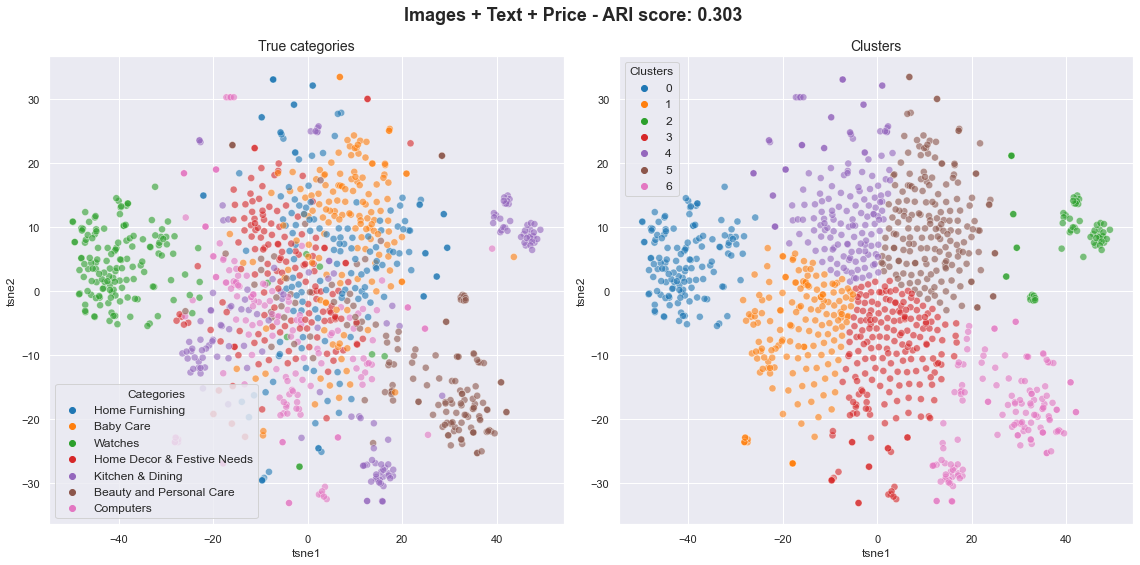

In [42]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
fig.suptitle(" Images + Text + Price - ARI score: " + str(round(ari, 3)),
             fontsize=18, fontweight="bold")    

sns.scatterplot(ax=axes[0], x="tsne1", y="tsne2", hue="class", 
                data=df_scaled_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[0].legend(loc="best", prop={"size": 12},
          title="Categories")
axes[0].set_title("True categories", fontsize=14)

sns.scatterplot(ax=axes[1], x="tsne1", y="tsne2", hue="cluster", 
                data=df_scaled_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[1].legend(loc="best", prop={"size": 12},
          title="Clusters")
axes[1].set_title("Clusters", fontsize=14)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>After adding the text features, we have gotten a similar result.</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.3. Confusion matrix</h4>
</div>

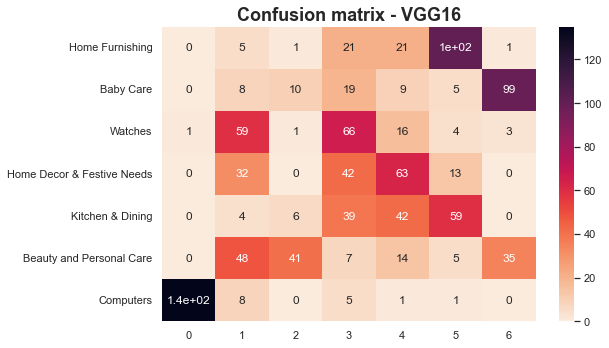

 >> ARI score:				0.303
 >> Accuracy classification score:	9.33
 >> Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.05      0.05      0.05       150
           2       0.02      0.01      0.01       150
           3       0.21      0.28      0.24       150
           4       0.25      0.28      0.27       150
           5       0.03      0.03      0.03       150
           6       0.00      0.00      0.00       150

    accuracy                           0.09      1050
   macro avg       0.08      0.09      0.09      1050
weighted avg       0.08      0.09      0.09      1050

--------------------------------------------------------------------------------




In [43]:
df_matrix = confusion_matrix(df_scaled_pca_tsne["class_encode"],
                             df_scaled_pca_tsne["cluster"])

df_matrix = pd.DataFrame(df_matrix, index=[class_encode for class_encode in df_scaled_pca_tsne["class"].unique().tolist()],
                         columns=range(len(df_scaled_pca_tsne["class"].unique())))

plt.figure(figsize = (9, 5))
plt.title("Confusion matrix - VGG16",
         fontsize=18, fontweight="bold")  
sns.heatmap(df_matrix, annot=True, cmap="rocket_r")

plt.tight_layout()
plt.show()

print(" >> ARI score:\t\t\t\t" + str(round(ari, 3)))
print(" >> Accuracy classification score:\t" + str(round(accuracy_score(df_scaled_pca_tsne["class_encode"],
                                                                        df_scaled_pca_tsne["cluster"])*100, 2)))

print(" >> Classification report")
print(classification_report(df_scaled_pca_tsne["class_encode"], df_scaled_pca_tsne["cluster"]))
print("-"*80)
print("\n")